In [2]:
import numpy as np
import pandas as pd
import random as nr
import matplotlib.pyplot as plt
import io

#리스트에서 딕셔너리 형태로 가져오기위한 라이브러리
from collections import Counter

#3D로 그래프를 표현하기 위한 라이브러리
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from google.colab import files
ul = files.upload()

Saving DataSet.csv to DataSet.csv


In [4]:
dataSet = pd.read_csv(io.BytesIO(ul['DataSet.csv']))

In [ ]:
print(dataSet['1번'].value_counts())
print(dataSet['2번'].value_counts())
print(dataSet['3번'].value_counts())
print(dataSet['4번'].value_counts())
print(dataSet['5번'].value_counts())
print(dataSet['6번'].value_counts())
print(dataSet['보너스번호'].value_counts())

In [ ]:
#1번~6번, 보너스번호의 총 숫자개수 판독
countList = list(dataSet['1번'])+ list(dataSet['2번'])+ list(dataSet['3번'])+ list(dataSet['4번'])+ list(dataSet['5번'])+ list(dataSet['6번'])+ list(dataSet['보너스번호'])
cnt = Counter(countList)
countNumber = list(zip(cnt.keys(),cnt.values()))
countNumber = sorted(countNumber,key=lambda x : x[0])
countNumber

In [7]:
#개수를 y축에 넣기위해 리스트에 넣기
valueList = []
for i in range(0,45):
  valueList.append(countNumber[i][1])

In [ ]:
plt.figure(figsize=(5,5))
# 각 숫자별로 개수 그래프에 넣어보기 
for i in range(len(valueList)):
  plt.scatter(i+1,valueList[i])
#큰 연관 관계는 없어 보이나 
#전반적으로 숫자가 클수록 출현 횟수의 저점과 고점이 더 높아진 것을 볼 수 있었다.
#숫자 12는 이와 무관하게 가장 많이 출현하였음.

In [ ]:
sortedCntN = pd.DataFrame(countNumber)
sortedCntN.index +=1
sortedCntN.columns = ['출현 숫자','개수']
sortedCntN

검정 픽셀의 개수는 다음과 같았다.(From ImageJ)

0: 4978

1: 3448

2: 3967

3: 4121

4: 4310

5: 4070

6: 4782

7: 3199

8: 5371

9: 4815

10000으로 나누어 리스트에 넣어보자.

In [ ]:
# rgb값이 '0'인 순수한 검정의 픽셀의 개수를 토대로 무게값 리스트 만들기
# 0부터 9까지 무게값 넣기
numbers = [0.4978,0.3448,0.3967,0.4121,0.4310,0.4070,0.4782,0.3199,0.5371,0.4815]
numberWeight = []

#2중 반복문으로 각 숫자별로 무게값 넣기
for i in range(0,5):
  for j in range(0,10):
    if i == 0:
      numberWeight.append(numbers[j])
    else :
      numberWeight.append(numbers[i]+numbers[j])

#0은 없으므로 가장 앞의 '0'의 무게값 삭제
numberWeight.remove(0.4978)

#45까지만 필요하므로 뒤에 4개는 삭제
for k in range(4):
  del numberWeight[45]

numberWeight

In [11]:
#무게별를 데이터 프레임에 추가해보자.
sortedCntN.insert(2,'무게',numberWeight)

In [ ]:
sortedCntN

In [ ]:
#무게가 아닌 출현 횟수로 정렬해보자.(내림차순)
sortedCntN = sortedCntN.sort_values(by = ['개수'],axis=0,ascending=False)
sortedCntN = sortedCntN.reset_index()
del sortedCntN['index']
sortedCntN.index+=1

In [ ]:
sortedCntN

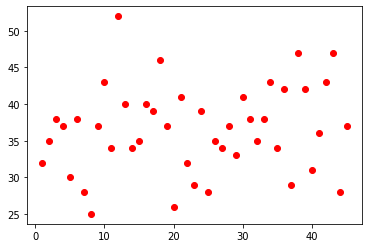

In [13]:
for i in range(1,len(sortedCntN['출현 숫자'])+1):
  plt.scatter(sortedCntN['출현 숫자'][i],sortedCntN['개수'][i],c = 'r')

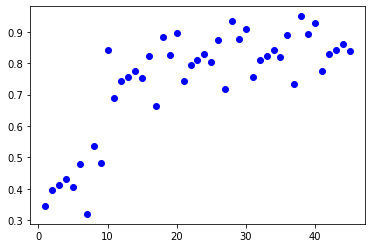

In [14]:
for i in range(1,len(sortedCntN['출현 숫자'])+1):
  plt.scatter(sortedCntN['출현 숫자'][i],sortedCntN['무게'][i],c = 'b')

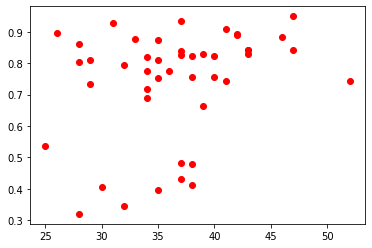

In [15]:
#전반적인 관계는 없어보인다.
for i in range(1,len(sortedCntN['출현 숫자'])+1):
  plt.scatter(sortedCntN['개수'][i],sortedCntN['무게'][i],c = 'r')

In [ ]:
#혹시 모르니 3차원으로 그려보았다.
size = []
for i in range(1,46):
  size.append(i*sortedCntN['개수'][i]*2)

plt.rcParams['figure.figsize'] = (50,50)
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(sortedCntN['출현 숫자'],sortedCntN['개수'],sortedCntN['무게'],c = 'g',marker = 'o',s = size,cmap = 'Greens')
plt.tick_params(axis='x', direction='in', length=3, pad=-40, labelsize=50, labelcolor='black', top=True)
plt.tick_params(axis='y', direction='inout', length=10, pad=-40, labelsize=50, width=2, color='black')
plt.tick_params(axis='z', direction='in', length=1, pad=-40, labelsize=40, width=2, color='black')
ax.set_xlabel('Number',fontsize = 30)
ax.set_ylabel('Number of times',fontsize = 30)
ax.set_zlabel('Weight',fontsize = 30)
plt.title('Correlation of Lotto Number and Weight',fontsize = 50)
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.zaxis.label.set_size(40)
ax.view_init(elev = 10,azim= 25)
plt.show()
#오히려 보기 더 어려워졌다. surface를 활용하고자 하였으나 
#z값이 x와 y의 평면으로 즉, 계산이 되어진
#방정식 형태여야 가능한 것으로 보였다.

In [ ]:
sortedCntN

In [17]:
# 일단, 무게비와 개수비를 계산하여 넣어보자.

cnt = sum(sortedCntN['개수'])
weight = sum(sortedCntN['무게'])

cntPer = (sortedCntN['개수']/1645)*100
weightPer = (sortedCntN['무게']/sum(sortedCntN['무게']))*100

In [ ]:
#데이터 프레임에 추가
sortedCntN.insert(3,'개수비',cntPer)
sortedCntN.insert(4,'무게비',weightPer)
sortedCntN

In [ ]:
#정확한 그래프를 위해 숫자순으로 다시 정렬해보자.
sortedCntN = sortedCntN.sort_values(by = ['출현 숫자'],axis=0)
sortedCntN = sortedCntN.reset_index()
del sortedCntN['index']
sortedCntN.index+=1
sortedCntN

In [ ]:
plt.figure(figsize=(5,5))
plt.hist([sortedCntN['개수비'],sortedCntN['무게비']])
#최고치에 해당하는 퍼센티지의 분포가 다르지만 데이터셋이 현저하게 적어서 일 수도 있다.
#무게비가 높을 수록 개수비도 높은 경향(?)은 있는 것 같아 보인다.

In [22]:
#무게값을 기준으로 가중치를 주고 역대 로또 번호를 맞출 수 있는 확률이 있나 확인해 보자.
#가중치로 줄 값은 개수*무게비로 해보자.
newWeight = sortedCntN['개수']*sortedCntN['무게비']*100/sum(sortedCntN['개수']*sortedCntN['무게비'])
sortedCntN.insert(5,'가중치',newWeight)

In [23]:
#가중치를 부여해 랜덤하게 1번부터 6번까지
numbers_weighted = nr.choices([i for i in range(1,46)],weights = newWeight,k = 6)

In [ ]:
#역대 당첨 번호들을 리스트로 만들어보자. 
dataSet

In [25]:
newDataSet = []
for i in range(len(dataSet.index)):
  newDataSet.append(dataSet.loc[i].tolist())

In [26]:
newDataSet = sorted(newDataSet,key=lambda x : x[0])

1등부터 3등사이의 당첨 횟수를 카운트하고
가중치 없는 랜덤한 추첨기와 비교해보자.


In [73]:
#가중치를 이용한 로또번호 추첨기
weight_HIT,chance,year = 0,100,20
memory = 0
winList1 = []

#회차를 알기 위해서 리스트끼리 == 비교를 하지말고 원소비교를 해보자.
for __ in range(100):
  for _ in range(year):
    weight_1st,weight_2nd,weight_3rd = 0,0,0
    for i in range(chance):
      numbers_weighted = lotto_lottery()
      remember = numbers_weighted[6]
      numbers_weighted.remove(remember)
      numbers_weighted = sorted(numbers_weighted,key=lambda x : x)
      for j in range(len(newDataSet)):
        cnt ,include = 0,0
        for k in range(1,7):
          if newDataSet[j][k] == numbers_weighted[k-1]:
            cnt+=1
        for q in range(1,7):
          if numbers_weighted[q-1] in newDataSet[j]:
            include +=1
        #3등부터 넣어보자.
        if include > 4 : 
          #1등인 경우 :
          if cnt == 6: weight_1st+=1
          elif include == 5 and remember == newDataSet[j][7]: weight_2nd +=1
          elif include == 5 : weight_3rd +=1
        if weight_1st > 0 :
          print("진짜 1등이라구!",j+733)
    winList1.append(weight_1st+weight_2nd+weight_3rd)
winList1
print(np.mean(winList1))

2.772


In [ ]:
def lotto_lottery():
  numberList = [i for i in range(1,46)]
  outNumber = []
  copyWeight = newWeight
  copyWeight = copyWeight.tolist()
  while len(numberList) > 38:
    inputNumber = nr.choices(numberList,weights = copyWeight,k = 1)
    idx = numberList.index(inputNumber[0])
    numberList.remove(inputNumber[0])
    copyWeight.remove(copyWeight[idx])
    outNumber.append(inputNumber[0])
  return outNumber

In [72]:
#가중치를 이용하지 않은 로또번호 추첨기
HIT,chance,year= 0,100,20
memory = 0
winList2 = []
#회차를 알기 위해서 리스트끼리 == 비교를 하지말고 원소비교를 해보자.
for __ in range(100):
  for _ in range(year):
    noWeight_1st,noWeight_2nd,noWeight_3rd = 0,0,0
    for i in range(chance):
      numbers = nr.sample(range(1,46),7)
      remember = numbers[6]
      numbers.remove(remember)
      numbers = sorted(numbers,key=lambda x : x)
      for j in range(len(newDataSet)):
        cnt ,include = 0,0
        for k in range(1,7):
          if newDataSet[j][k] == numbers[k-1]:
            cnt+=1
        for q in range(1,7):
          if numbers[q-1] in newDataSet[j]:
            include +=1
        #3등부터 넣어보자.
        if include > 4 : 
          #1등인 경우 :
          if cnt == 6: noWeight_1st+=1
          elif include == 5 and remember == newDataSet[j][7]: noWeight_2nd +=1
          elif include == 5 : noWeight_3rd +=1
        if noWeight_1st > 0 :
          print("진짜 1등이라구!",j+733)
    winList2.append(noWeight_1st+noWeight_2nd+noWeight_3rd)
winList2
print(np.mean(winList2))

2.3135


1년에 평균 3등 이내로 당첨 된 로또 개수 =  15.4


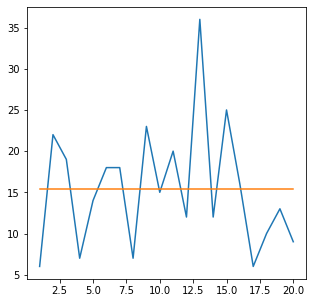

In [31]:
plt.figure(figsize=(5,5))
plt.plot([i for i in range(1,21)],winList1)
plt.plot([i for i in range(1,21)],[np.mean(winList1)]*20)
print("1년에 평균 3등 이내로 당첨 된 로또 개수 = ",np.mean(winList1))

1년에 평균 3등 이내로 당첨 된 로또 개수 =  2.2


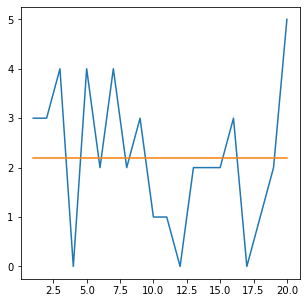

In [32]:
plt.figure(figsize=(5,5))
plt.plot([i for i in range(1,21)],winList2)
plt.plot([i for i in range(1,21)],[np.mean(winList2)]*20)
print("1년에 평균 3등 이내로 당첨 된 로또 개수 = ",np.mean(winList2))